In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
X = np.eye(8)
#Each row is a learning example

Y = X
print(Y)

# We need to have 8 inputs (each number in a row of the matrix), a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
n_hidden = 3
n_output = 8

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [106]:
epsilon = 0.1

#Weights
# np.random.seed(42)

w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
print(w1)
w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
print(w2)

# # w1 = np.zeros((n_input, n_hidden))
# # print(w1)
# # w2 = np.zeros((n_hidden, n_output))

#Biases
b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)

# b1 = np.zeros(n_hidden)
# b2 = np.zeros(n_output)






[[ 0.1846637  -0.10700848 -0.15255252]
 [-0.06919081 -0.0045586   0.02433394]
 [-0.02412361  0.03520554 -0.12515394]
 [ 0.14437646 -0.00821512  0.11172958]
 [ 0.03427253  0.04567532  0.05697673]
 [ 0.04477086  0.06427228  0.13291525]
 [ 0.01965212  0.07090038 -0.00897357]
 [ 0.14401172 -0.06763923  0.18009404]]
[[-0.0040158  -0.14307751  0.01281044 -0.06810517  0.08406435 -0.0652624
  -0.04461834 -0.18895407]
 [-0.04523063 -0.24238793 -0.15839028  0.07604147  0.07858002  0.04254576
  -0.09669761 -0.00477114]
 [-0.00036025 -0.11583647  0.15033983  0.08773623 -0.02209642  0.00268858
   0.02083828 -0.20417349]]


In [107]:
#Activation function, our single neuron corresponds exactly to the input-output mapping defined by logistic regression.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Used to compute the weighted input for a layer, which then is put into the activation function
def weighted_input(X, W, b):
    return np.dot(X, W) + b

#One-half squared-error cost function
def halfmse(Y, second_layer_output):
    return np.mean(0.5 * (Y - second_layer_output) ** 2)

In [108]:

#Could also have used a*(1-a) if we don't want to calculate z serperatly
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

#Element-wise multiplication
def delta_output(Y, a, z):
    return (a-Y)*sigmoid_derivative(z)

#In order to do the matrix multiplication, we use this order because each row is a learning example
def delta_hidden(W, next_delta, z):
    return np.dot(next_delta, np.transpose(W))*sigmoid_derivative(z)

#In order to do the matrix multiplication, again we use this order because each row is a learning example
def gradient_weight(next_delta, a):
    return np.dot(np.transpose(a), next_delta)
    
#Sum over rows (axis=0), as again each row is a learning example
def gradient_bias(next_delta):
    return np.sum(next_delta, axis=0)


In [109]:

alpha = 1

converged = False
i = 0

#For plotting
it_plot = []
loss_plot = []

while(converged is False):
    #Feedforward pass
    
    #Input layer
    a1 = X

    #Hidden layer
    z2 = weighted_input(X, w1, b1)
    a2 = sigmoid(z2)
    
    #Output layer
    z3 = weighted_input(a2, w2, b2)
    a3 = sigmoid(z3)
    
    #Backwards pass

    #Output layer
    delta3 = delta_output(Y, a3, z3)

    #Hidden layer
    delta2 = delta_hidden(w2, delta3, z2)
    
    #Gradient for weight is same shape as W1/W2 (8x3/3x8)
    #Gradient for bias is same shape as b1/b2 (1x3/1x8)
    Delta_w2 = gradient_weight(delta3, a2)
    Delta_b2 = gradient_bias(delta3)

    Delta_w1 = gradient_weight(delta2, X)
    Delta_b1 = gradient_bias(delta2)

    #Update weights, devide by amount of learning examples
    w1 += -alpha*(Delta_w1/8)
    w2 += -alpha*(Delta_w2/8)

    #Update bias
    b1 += -alpha*(Delta_b1/8)
    b2 += -alpha*(Delta_b2/8)
    
    #Keep track for plot
    loss_plot.append(halfmse(Y,a3))
    it_plot.append(i)
    i+=1
    
    if i % 1000 == 0:
            print("MSE after iteration", i, ":", halfmse(Y, a3))
             
            # print(w1)
            # print(w2)
            
            print(a3)
            
    if halfmse(Y,a3) < 0.01:
        converged = True
        print("MSE after iteration", i, ":", halfmse(Y, a3))
             
        print(w1)
        print(w2)
            
        print(a2)
        print(a3)


        break
            
          
           

MSE after iteration 1000 : 0.0434636267360288
[[0.698212   0.11194313 0.1557221  0.09705953 0.18161204 0.06248446
  0.12114863 0.12895817]
 [0.08873029 0.46470866 0.21525758 0.17513538 0.11531401 0.21298097
  0.16117732 0.15540838]
 [0.12985366 0.18995419 0.15351381 0.14264726 0.11922821 0.13340554
  0.11650338 0.11747072]
 [0.0660756  0.12525417 0.11817399 0.14381888 0.13106548 0.16603473
  0.11004045 0.10797449]
 [0.14406505 0.07911174 0.09861219 0.12060727 0.20266996 0.16622693
  0.12430994 0.11965496]
 [0.0335998  0.16426487 0.1123732  0.15865963 0.16564568 0.28082907
  0.13993553 0.12844395]
 [0.09670324 0.13827307 0.12163692 0.13852119 0.16028981 0.18080371
  0.12716513 0.12268481]
 [0.10551965 0.13067245 0.12202586 0.13634604 0.1535255  0.16467903
  0.12148922 0.11855583]]
MSE after iteration 2000 : 0.018547484200854485
[[8.39378421e-01 2.90877388e-02 1.69924104e-01 5.02507513e-02
  1.08447955e-01 1.09891637e-03 1.38487205e-01 1.40658183e-01]
 [4.29861613e-02 8.00313783e-01 1.52

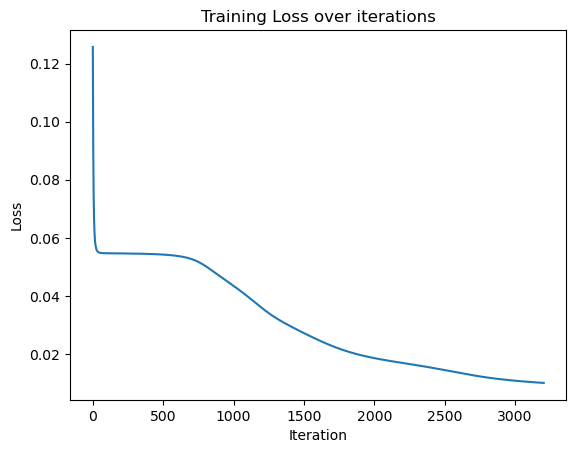

In [110]:
plt.plot(it_plot, loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over iterations")
plt.show()

In [111]:

alpha_list = [0.01, 0.05, 0.25, 1.25, 5, 25, 50]



#For plotting
it_needed_plot = []
alpha_plot = []

for alpha in alpha_list:
    converged = False
    i = 0
    
    #Again initialization, as w1, w2, b1, and b2 are already updated for convergence before.
    w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
    print(w1)
    w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
    print(w2)

    #Biases
    b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
    b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)
    
    while(converged is False):
        
        #Input layer
        a1 = X

        #Hidden layer
        z2 = weighted_input(X, w1, b1)
        a2 = sigmoid(z2)
        
        #Output layer
        z3 = weighted_input(a2, w2, b2)
        a3 = sigmoid(z3)

        #Output layer
        delta3 = delta_output(Y, a3, z3)

        #Hidden layer
        delta2 = delta_hidden(w2, delta3, z2)
        
        #Gradient for weight is same shape as W1/W2 (8x3/3x8)
        #Gradient for bias is same shape as b1/b2 (1x3/1x8)
        Delta_w2 = gradient_weight(delta3, a2)
        Delta_b2 = gradient_bias(delta3)

        Delta_w1 = gradient_weight(delta2, X)
        Delta_b1 = gradient_bias(delta2)

        #Update weights, devide by amount of learning examples
        w1 += -alpha*(Delta_w1/8)
        w2 += -alpha*(Delta_w2/8)

        #Update bias
        b1 += -alpha*(Delta_b1/8)
        b2 += -alpha*(Delta_b2/8)
        
        i += 1
        
        if i % 1000 == 0:
                print("MSE after iteration", i, ":", halfmse(Y, a3))
                
                # print(w1)
                # print(w2)
                
                print(a3)
                
        #Converged if loss is below 0.01
        if halfmse(Y,a3) < 0.01:
            converged = True
            print("MSE after iteration", i, ":", halfmse(Y, a3))
                
            print(w1)
            print(w2)
                
            print(a3)
            
            it_needed_plot.append(i)
            alpha_plot.append(alpha)
        

            break

[[-0.06469368  0.06982233  0.03934854]
 [ 0.08951932  0.06351718  0.10495527]
 [-0.05352352  0.13173941  0.01975996]
 [ 0.20752609 -0.06891878  0.17359638]
 [ 0.01979108 -0.0651418  -0.04838858]
 [-0.03203473  0.04241659  0.05228355]
 [-0.05737    -0.00243546  0.21422704]
 [ 0.17275432  0.04363237  0.00380035]]
[[ 0.01200313  0.0613518  -0.10227926 -0.02573765 -0.16685841  0.03992231
   0.06471959 -0.04831865]
 [ 0.15739868 -0.12257657 -0.14643749  0.02244518  0.10470983  0.16839277
  -0.04588843  0.10786808]
 [-0.00385085 -0.01726273  0.08836599  0.06523229 -0.15763922  0.14765403
   0.13800914 -0.06255627]]
MSE after iteration 1000 : 0.06472017897375076
[[0.27054383 0.26117449 0.26191671 0.27756185 0.26374393 0.2780048
  0.27753754 0.25179057]
 [0.26754058 0.25924383 0.25898416 0.27454847 0.25925501 0.27542961
  0.27539431 0.2490479 ]
 [0.27039697 0.26053379 0.26113739 0.2770202  0.26356413 0.27774888
  0.27683279 0.25167289]
 [0.26581618 0.25957043 0.25887521 0.27380206 0.25657753 0

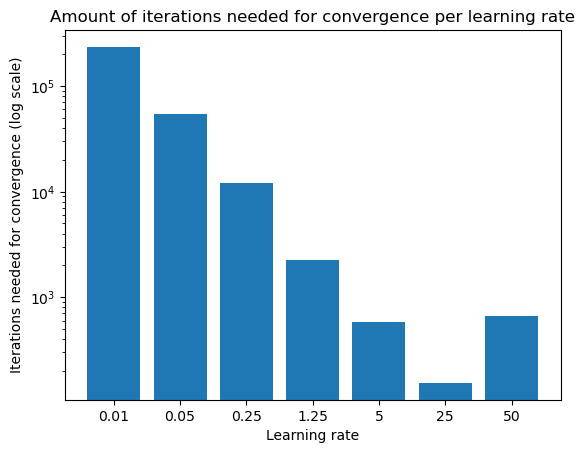

In [112]:
plt.bar(range(len(alpha_plot)),it_needed_plot)

plt.xlabel("Learning rate")
plt.ylabel("Iterations needed for convergence (log scale)")

plt.yscale('log')
plt.xticks(range(len(alpha_list)), alpha_list)

plt.title("Amount of iterations needed for convergence per learning rate")

plt.show()